In [1]:
#importing required python libraries and matplotlib for plotting
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline

In [2]:
tableData = pd.read_table("babyboom.dat.txt", header=None, sep='\s+', 
                   names=['24hr time','sex','weight','minutes'])
tableData

,24hr time,sex,weight,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177
5,405,1,2208,245
6,407,1,1745,247
7,422,2,2846,262
8,431,2,3166,271
9,708,2,3520,428


In [3]:
tableData.describe()

,24hr time,sex,weight,minutes
count,44.000000,44.000000,44.000000,44.000000
mean,1296.000000,1.590909,3275.954545,788.727273
std,690.704561,0.497350,528.032458,416.066931
min,5.000000,1.000000,1745.000000,5.000000
25%,792.750000,1.000000,3141.500000,482.750000
50%,1406.500000,2.000000,3404.000000,846.500000
75%,1918.500000,2.000000,3571.750000,1158.500000
max,2355.000000,2.000000,4162.000000,1435.000000


In [4]:
#finding the corelation between the columns
tableData.corr()

,24hr time,sex,weight,minutes
24hr time,1.000000,0.028027,0.075636,0.999840
sex,0.028027,1.000000,0.228751,0.031815
weight,0.075636,0.228751,1.000000,0.079616
minutes,0.999840,0.031815,0.079616,1.000000


c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


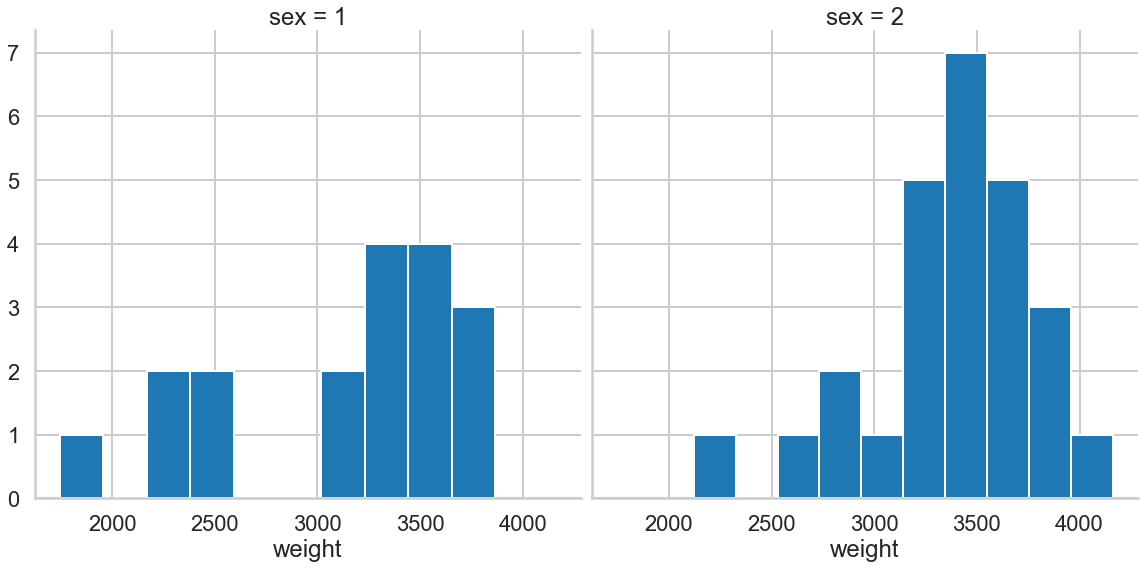

In [5]:
#plot for weights of babies for categorical column sex
SWplot = sns.FacetGrid(col="sex", data=tableData, size=8)
SWplot.map(plt.hist, "weight")

Text(0, 0.5, 'exponential analysis')

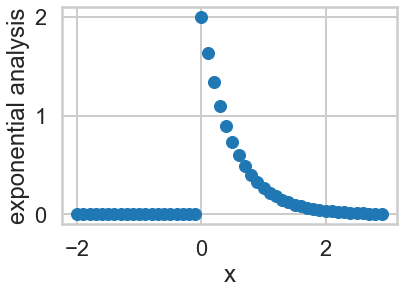

In [10]:
#modeling number of births over 24hr peroid using posion distribution
f = lambda x, l: l*np.exp(-l*x)*(x>0)
xpts=np.arange(-2,3,0.1)
plt.plot(xpts,f(xpts, 2),'o');
plt.xlabel("x")
plt.ylabel("exponential analysis")

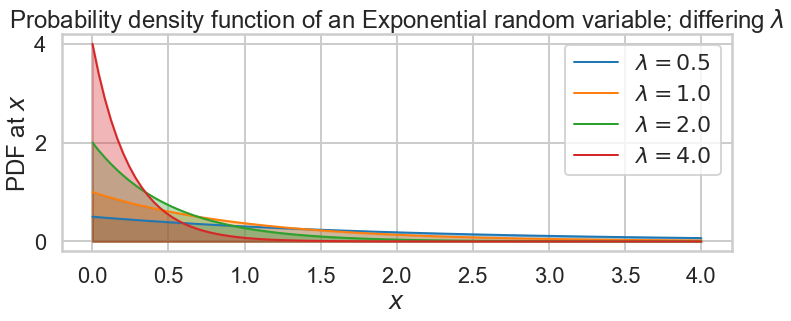

In [11]:
from scipy.stats import expon

x = np.linspace(0,4, 100)
colors=sns.color_palette()

lambda_ = [0.5, 1, 2, 4]
plt.figure(figsize=(12,4))
for l,c in zip(lambda_,colors):
    plt.plot(x, expon.pdf(x, scale=1./l), lw=2, 
                color=c, label = "$\lambda = %.1f$"%l)
    plt.fill_between(x, expon.pdf(x, scale=1./l), color=c, alpha = .33)
    
plt.legend()
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");

c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


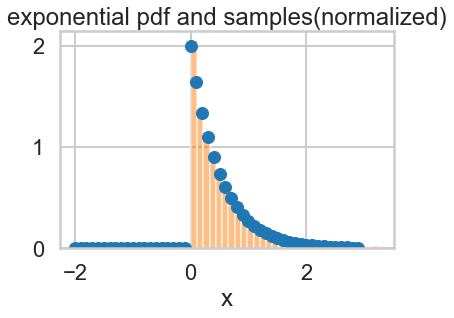

In [12]:
#using the built in machinery in scipy.stats
from scipy.stats import expon
plt.plot(xpts,expon.pdf(xpts, scale=1./2.),'o')
plt.hist(expon.rvs(size=1000, scale=1./2.), normed=True, alpha=0.5, bins=30);
plt.xlabel("x")
plt.title("exponential pdf and samples(normalized)");

c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


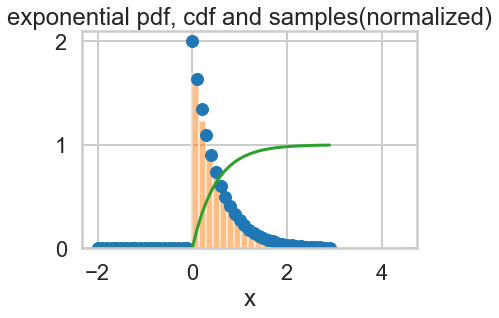

In [16]:
#for expon called frozen object we can create a object to that
obj = expon(scale=0.5)
plt.plot(xpts,obj.pdf(xpts),'o')
plt.hist(obj.rvs(size=1000), normed=True, alpha=0.5, bins=30);
plt.plot(xpts, obj.cdf(xpts));
plt.xlabel("x")
plt.title("exponential pdf, cdf and samples(normalized)");

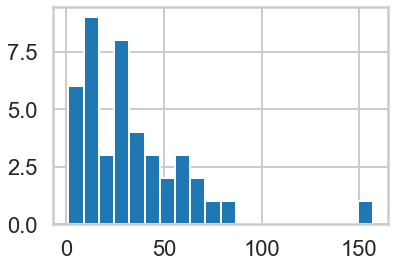

In [17]:
#histogram for inner birth times
birthtimes = tableData.minutes.diff()[1:]
birthtimes.hist(bins=20);

In [20]:
lambda_from_mean = 1./birthtimes.mean()
print(lambda_from_mean, 1/lambda_from_mean)

0.03006993006993007 33.25581395348837


c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


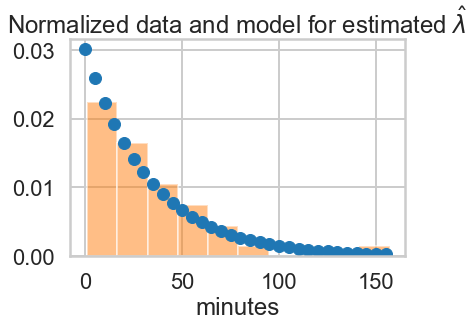

In [21]:
minutes=np.arange(0, 160, 5)
obj = expon(scale=1./lambda_from_mean)
plt.plot(minutes,obj.pdf(minutes),'o')
birthtimes.hist(normed=True, alpha=0.5);
plt.xlabel("minutes");
plt.title("Normalized data and model for estimated $\hat{\lambda}$");

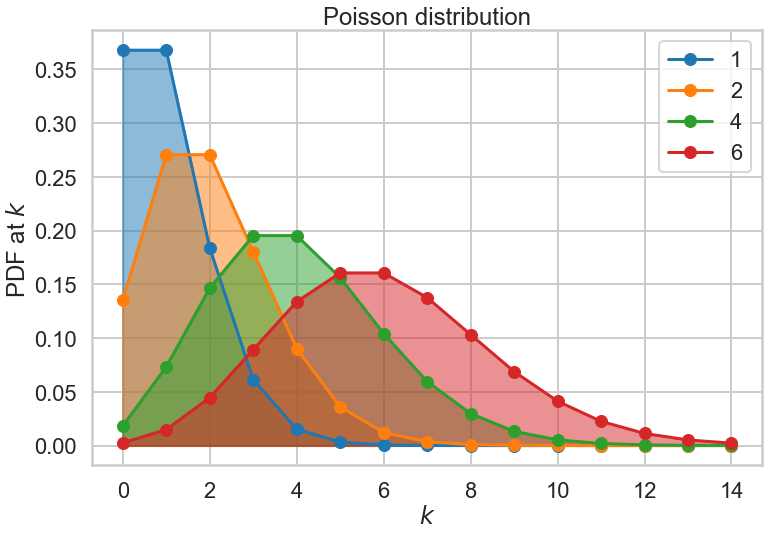

In [22]:
#possion distribution
from scipy.stats import poisson
k = np.arange(15)
plt.figure(figsize=(12,8))
for i, lambda_ in enumerate([1, 2, 4, 6]):
    plt.plot(k, poisson.pmf(k, lambda_), '-o', label=lambda_, color=colors[i])
    plt.fill_between(k, poisson.pmf(k, lambda_), color=colors[i], alpha=0.5)
    plt.legend()
plt.title("Poisson distribution")
plt.ylabel("PDF at $k$")
plt.xlabel("$k$");

In [26]:
perHr = tableData.minutes // 60
birthsPerHr=tableData.groupby(perHr).minutes.count()
birthsPerHr

minutes
0     1
1     3
2     1
4     4
7     2
8     2
9     1
10    3
11    1
12    2
13    1
14    4
15    1
16    2
17    1
18    3
19    4
20    3
21    2
22    1
23    2
Name: minutes, dtype: int64

In [27]:
birthsPerHr.describe()

count    21.000000
mean      2.095238
std       1.091089
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: minutes, dtype: float64

c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


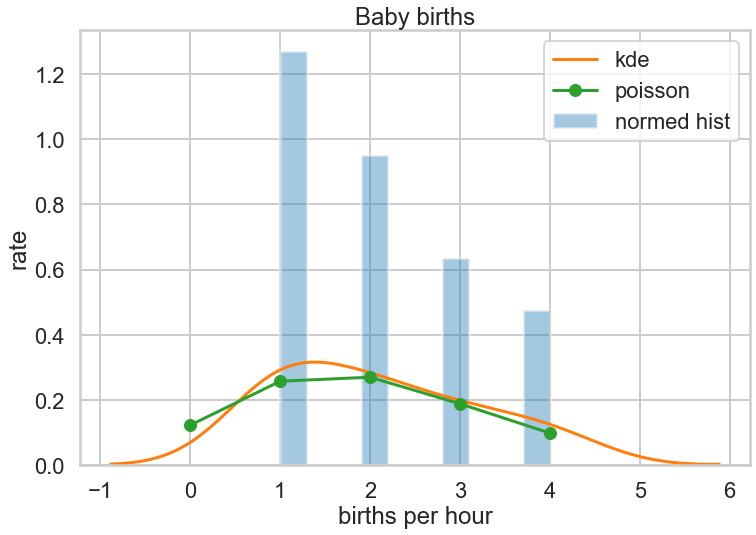

In [28]:
k = np.arange(5)
plt.figure(figsize=(12,8))
tcount=num_births_per_hour.sum()
plt.hist(num_births_per_hour, alpha=0.4,  lw=3, normed=True, label="normed hist")
sns.kdeplot(num_births_per_hour, label="kde")
plt.plot(k, poisson.pmf(k, num_births_per_hour.mean()), '-o',label="poisson")
plt.title("Baby births")
plt.xlabel("births per hour")
plt.ylabel("rate")
plt.legend();

In [36]:
#Segue: many samples on the binomial
from scipy.stats.distributions import bernoulli
def throwCoin(n):
    brv = bernoulli(0.5)
    return brv.rvs(size=n)

In [37]:
#returns the mean for each sample in an ensemble of samples
def makeThrows(numberOfSamples, sampleSize):
    start=np.zeros((numberOfSamples, sampleSize), dtype=int)
    for i in range(numberOfSamples):
        start[i,:]=throwCoin(sampleSize)
    return np.mean(start, axis=1)

In [39]:
sampleSizes=np.arange(1,1001,1)
sampleMeans = [makeThrows(numberOfSamples=200, sampleSize=i) for i in sampleSizes]

In [40]:
sampleMeans_Mean = [np.mean(means) for means in sampleMeans]

(0.48, 0.52)

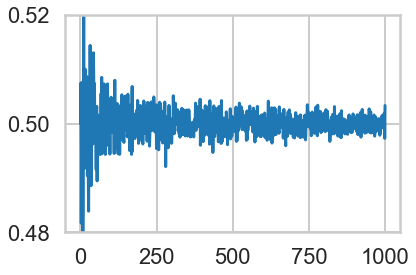

In [42]:
plt.plot(sampleSizes, sampleMeans_Mean)
plt.ylim([0.480,0.520])

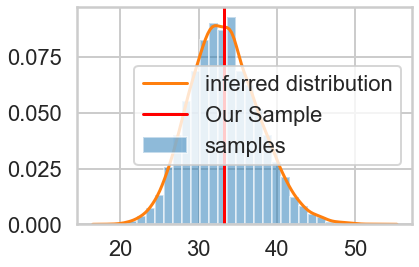

In [47]:
#
M_samples=10000
N_points = birthtimes.shape[0]
bs_np = np.random.choice(birthtimes, size=(M_samples, N_points))
sd_mean=np.mean(bs_np, axis=1)
sd_std=np.std(bs_np, axis=1)
plt.hist(sd_mean, bins=30, density=True, alpha=0.5,label="samples");
sns.kdeplot(sd_mean, label="inferred distribution")
plt.axvline(birthtimes.mean(), 0, 1, color='r', label='Our Sample')
plt.legend()

c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


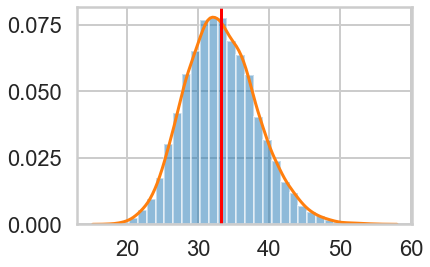

In [49]:
onj = expon(scale=1./lambda_from_mean)
M_samples=10000
N_points = birthtimes.shape[0]
bs_p = onj.rvs(size=(M_samples, N_points))
sd_mean_p=np.mean(bs_p, axis=1)
sd_std_p=np.std(bs_p, axis=1)
plt.hist(sd_mean_p, bins=30, normed=True, alpha=0.5);
sns.kdeplot(sd_mean_p);
plt.axvline(birthtimes.mean(), 0, 1, color='r', label='Our Sample')